<a href="https://colab.research.google.com/github/sumiyabintaymostofa/student-performance-prediction/blob/main/student_performance_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/bd_students_per_v2.csv')


In [3]:
df.head()

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8612 non-null   int64 
 1   full_name                    8612 non-null   object
 2   age                          8612 non-null   int64 
 3   gender                       8612 non-null   object
 4   location                     8611 non-null   object
 5   family_size                  8612 non-null   int64 
 6   mother_education             8602 non-null   object
 7   father_education             8608 non-null   object
 8   mother_job                   8612 non-null   object
 9   father_job                   8612 non-null   object
 10  guardian                     8612 non-null   object
 11  parental_involvement         8612 non-null   object
 12  internet_access              8612 non-null   object
 13  studytime                    8612

In [5]:
obj_col= df.select_dtypes(include='object').columns
print(obj_col)

Index(['full_name', 'gender', 'location', 'mother_education',
       'father_education', 'mother_job', 'father_job', 'guardian',
       'parental_involvement', 'internet_access', 'tutoring', 'school_type',
       'extra_curricular_activities', 'stu_group'],
      dtype='object')


In [7]:
from sklearn.preprocessing import LabelEncoder

# Use obj_col which contains the actual object type columns in the DataFrame
cat_cols = obj_col
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [8]:
df.isnull().sum()

,0
id,0
full_name,0
age,0
gender,0
location,0
family_size,0
mother_education,0
father_education,0
mother_job,0
father_job,0


In [10]:
X = df.drop('stu_group', axis=1)
y = df['stu_group']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
#Knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Predict
y_pred = knn.predict(X_test)

In [15]:
#Evaluation with Full Metrics KNN
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr', average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.4405
Precision: 0.4451
Recall: 0.4405
F1 Score: 0.4373
ROC AUC Score: 0.6163
Balanced Accuracy: 0.4427
Matthews Corr Coef: 0.1653


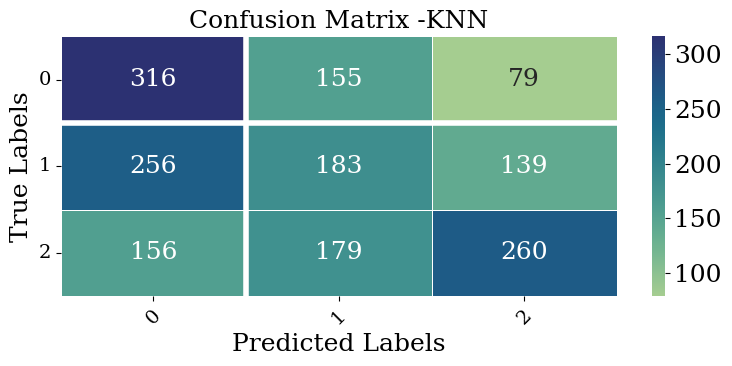

In [16]:
#Confusion Matrix KNN
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix -KNN"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = np.unique(y_test)  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(class_labels, rotation=45, fontsize=14)
ax.set_yticklabels(class_labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()


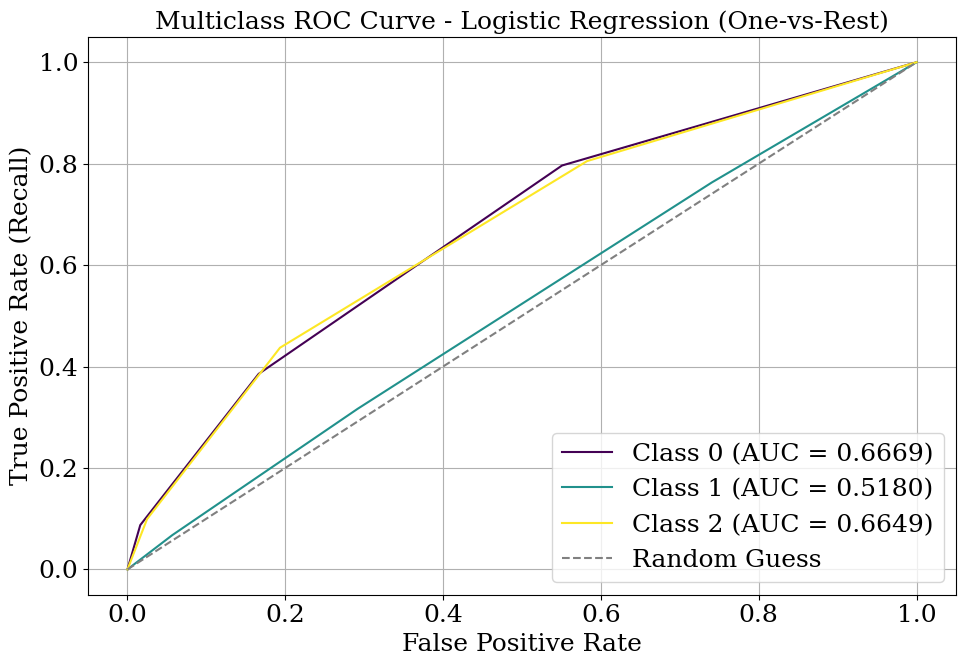

In [18]:
#Roc Curve Logistic Regression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np # Import numpy for generating colors

plt.figure(figsize=(10, 7))
# Get a color map and generate colors for each class
num_classes = len(knn.classes_)
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))  # Use a colormap to generate colors

for idx, positive_class in enumerate(knn.classes_):
    # Get the column index of the current class
    class_index = list(knn.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = knn.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Logistic Regression (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

#Evaluation with Full Metrics Decision tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf .predict_proba(X_test), multi_class='ovr', average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9739
Precision: 0.9741
Recall: 0.9739
F1 Score: 0.9739
ROC AUC Score: 0.9804
Balanced Accuracy: 0.9740
Matthews Corr Coef: 0.9609


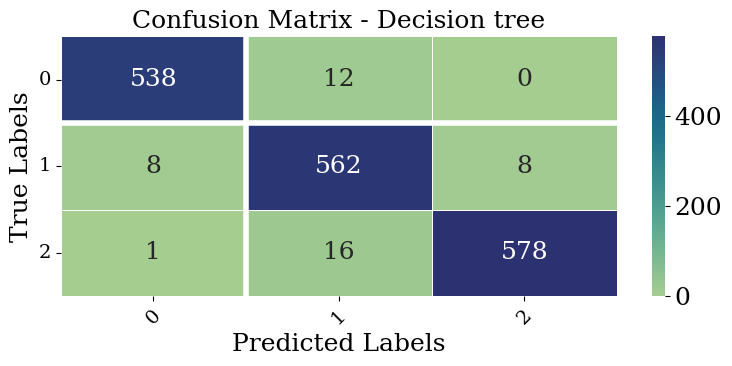

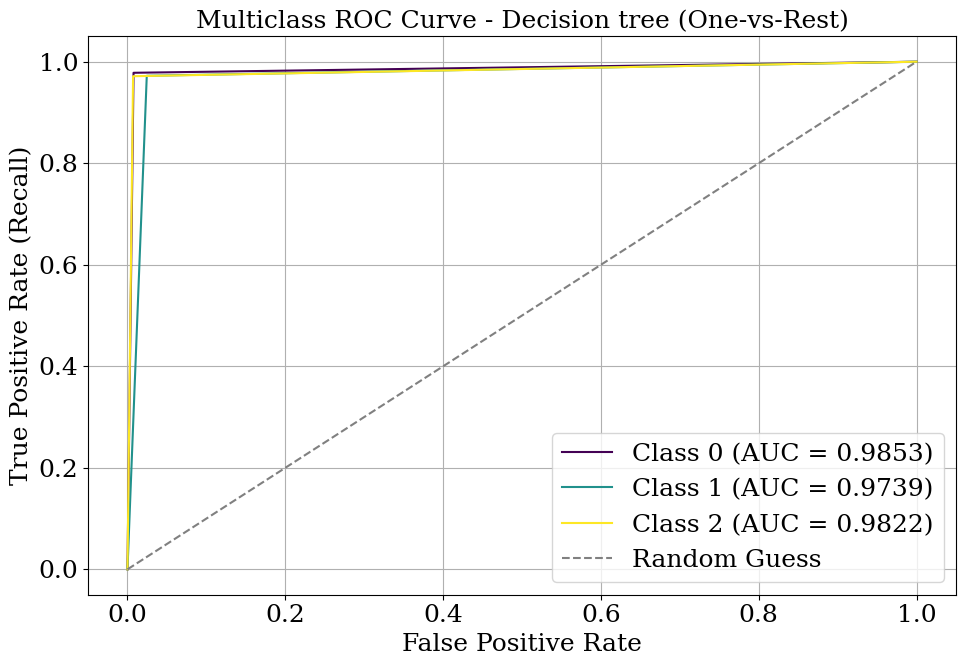

In [22]:
#Confusion Matrix Decision tree
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Decision tree"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

#Roc Curve Decision tree
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np # Import numpy for generating colors

plt.figure(figsize=(10, 7))
# Get a color map and generate colors for each class
num_classes = len(clf.classes_)
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))  # Use a colormap to generate colors

for idx, positive_class in enumerate(clf.classes_):
    # Get the column index of the current class
    class_index = list(clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Decision tree (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Random Froest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

#Evaluation with Full Metrics Random Froest
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test), multi_class='ovr', average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9843
Precision: 0.9846
Recall: 0.9843
F1 Score: 0.9844
ROC AUC Score: 0.9995
Balanced Accuracy: 0.9843
Matthews Corr Coef: 0.9766


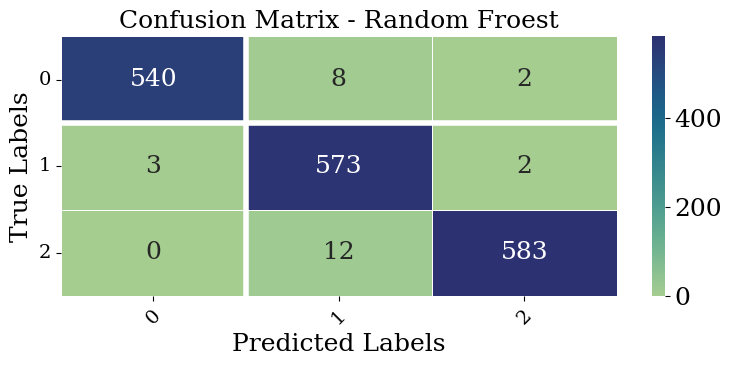

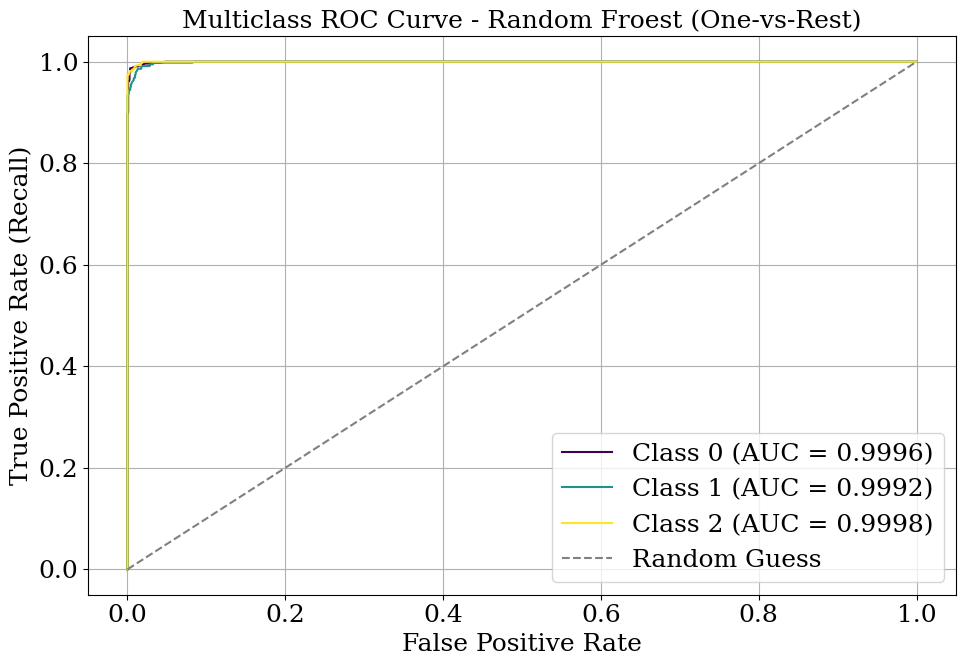

In [26]:
#Confusion Matrix Random Froest
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Random Froest"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

#Roc Curve Random Froest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np # Import numpy for generating colors

plt.figure(figsize=(10, 7))
# Get a color map and generate colors for each class
num_classes = len(rf_clf.classes_)
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))  # Use a colormap to generate colors

for idx, positive_class in enumerate(rf_clf.classes_):
    # Get the column index of the current class
    class_index = list(rf_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = rf_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Random Froest (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

# Step 5: Predict
y_pred = gb_clf.predict(X_test)

#Evaluation with Full Metrics Gradient Boosting
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, gb_clf.predict_proba(X_test), multi_class='ovr', average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.9855
Precision: 0.9857
Recall: 0.9855
F1 Score: 0.9855
ROC AUC Score: 0.9995
Balanced Accuracy: 0.9856
Matthews Corr Coef: 0.9783


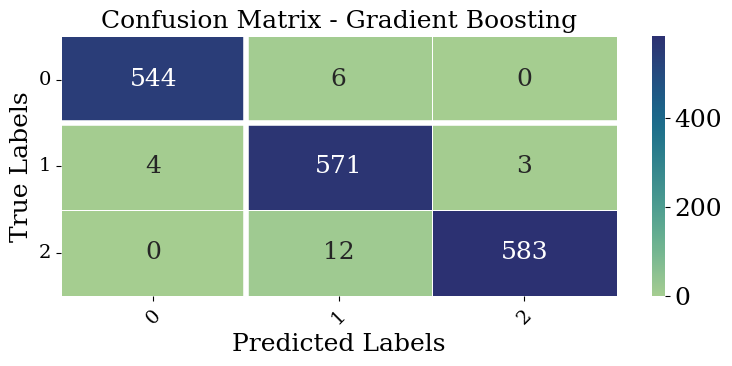

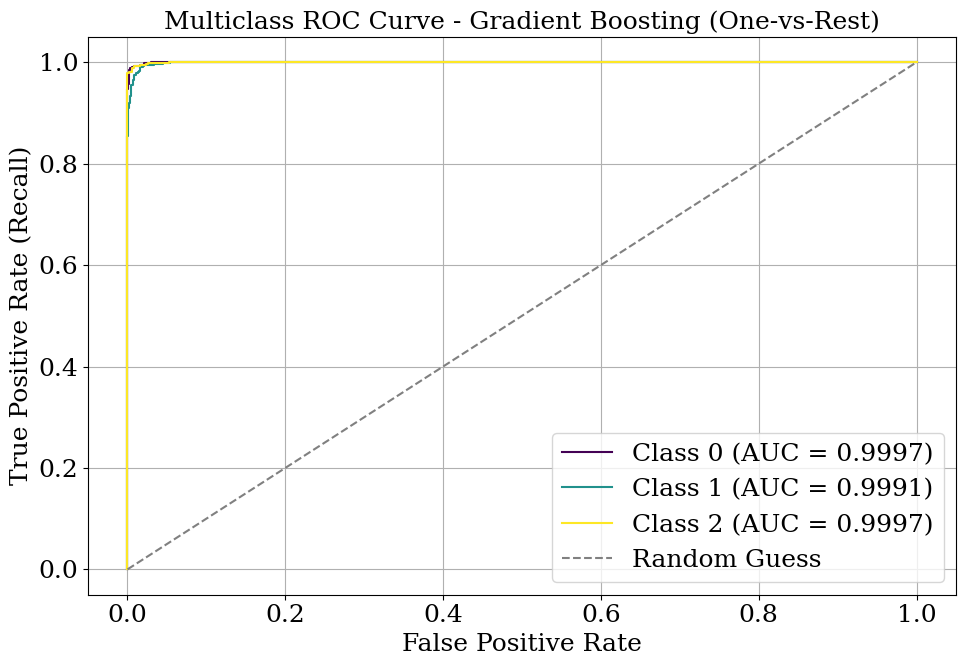

In [30]:
#Confusion Matrix Gradient Boosting
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix - Gradient Boosting"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

#Roc Curve Gradient Boosting
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np # Import numpy for generating colors

plt.figure(figsize=(10, 7))
# Get a color map and generate colors for each class
num_classes = len(gb_clf.classes_)
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))  # Use a colormap to generate colors

for idx, positive_class in enumerate(gb_clf.classes_):
    # Get the column index of the current class
    class_index = list(gb_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = gb_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Gradient Boosting (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
#Support Vectore Machine
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(X_train, y_train)

#Predict
y_pred = svm_clf.predict(X_test)

#Evaluation with Full Metrics Support Vectore Machine
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, svm_clf.predict_proba(X_test), multi_class='ovr', average='weighted')
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Matthews Corr Coef: {mcc:.4f}")

Accuracy: 0.4237
Precision: 0.4189
Recall: 0.4237
F1 Score: 0.4157
ROC AUC Score: 0.6172
Balanced Accuracy: 0.4227
Matthews Corr Coef: 0.1355


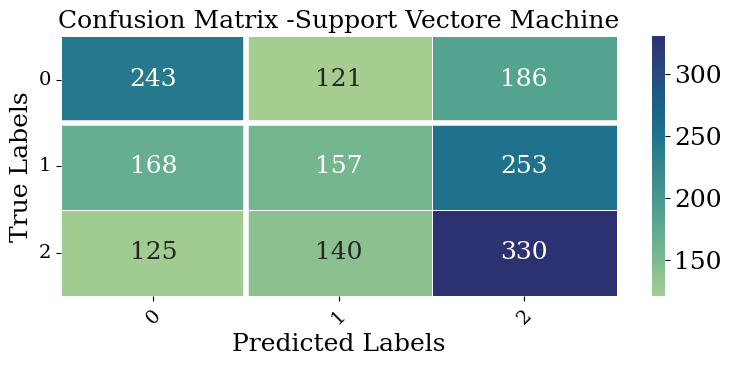

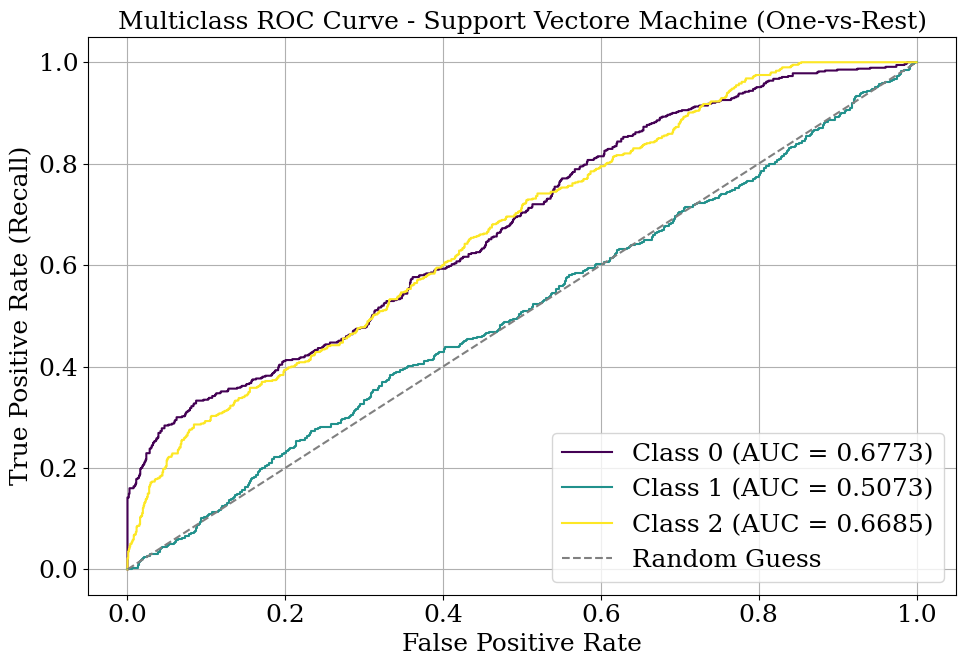

In [34]:
#Confusion Matrix Support Vectore Machine
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Title
title = "Confusion Matrix -Support Vectore Machine"

# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = np.unique(y_test)  # or ['No', 'Yes'] if binary

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)

# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()

#Roc Curve Support Vectore Machine
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np # Import numpy for generating colors

plt.figure(figsize=(10, 7))
# Get a color map and generate colors for each class
num_classes = len(svm_clf.classes_)
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))  # Use a colormap to generate colors

for idx, positive_class in enumerate(svm_clf.classes_):
    # Get the column index of the current class
    class_index = list(svm_clf.classes_).index(positive_class)

    # Get predicted probabilities for the current class
    y_prob_val = svm_clf.predict_proba(X_test)[:, class_index]

    # Convert y_test to binary (1 for current class, 0 for others)
    y_test_binary = (y_test == positive_class).astype(int)

    # Compute ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob_val)
    roc_auc = roc_auc_score(y_test_binary, y_prob_val)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'Class {positive_class} (AUC = {roc_auc:.4f})',
             color=colors[idx])

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve - Support Vectore Machine (One-vs-Rest)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()